Imports

In [2]:
import numpy as np
import pandas as pd

Reading the file

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HoverHander/CS4661-Final-Project/main/Datasets/train.csv')

Try decision tree with categorical features

In [4]:
# replaces NA features with 0
fill_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea']
df[fill_columns] = df[fill_columns].fillna(0)

# should identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded[0::10]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
10      11          20         70.0    11200            5            5   
20      21          60        101.0    14215            8            5   
30      31          70         50.0     8500            4            4   
40      41          20         84.0     8658            6            5   
...    ...         ...          ...      ...          ...          ...   
1410  1411          60         79.0    12420            7            5   
1420  1421          60         90.0    11700            6            6   
1430  1431          60         60.0    21930            5            5   
1440  1441          70         79.0    11526            6            7   
1450  1451          90         60.0     9000            5            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003       196.0         706  ...               0   
10         1965          1965         0.0         906  ...               0   
20         2005          2006       380.0           0  ...               0   
30         1920          1950         0.0           0  ...               0   
40         1965          1965       101.0         643  ...               0   
...         ...           ...         ...         ...  ...             ...   
1410       2001          2001         0.0         666  ...               0   
1420       1968          1968       420.0         404  ...               0   
1430       2005          2005         0.0           0  ...               0   
1440       1922          1994         0.0           0  ...               0   
1450       1974          1974         0.0           0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
10               0             0            1                      0   
20               1             0            0                      0   
30               0             0            1                      0   
40               0             0            1                      1   
...            ...           ...          ...                    ...   
1410             0             0            1                      0   
1420             0             0            1                      0   
1430             0             0            1                      0   
1440             0             0            1                      0   
1450             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
10                        0                     0                     0   
20                        0                     0                     0   
30                        0                     0                     0   
40                        0                     0                     0   
...                     ...                   ...                   ...   
1410                      0                     0                     0   
1420                      0                     0                     0   
1430                      0                     0                     0   
1440                      0                     0                     0   
1450                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
10                       1                      0  
20                       0                      1  
30                       1                      0  
40                       0                      0  
...                    ...                    ...  
1410                     1                      0  


In [5]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1460, 290)
y shape:  (1460,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

0.0045662100456621


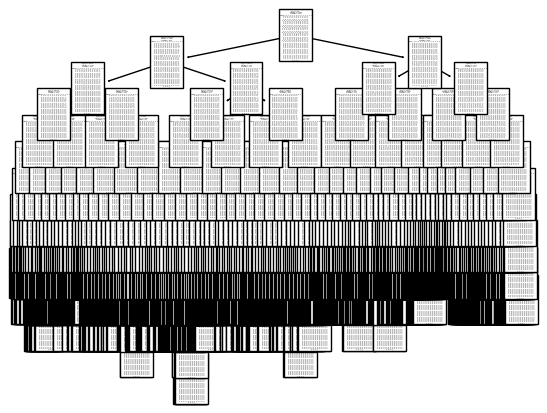

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

dt = DecisionTreeClassifier(random_state = 5, criterion = "entropy", max_depth = None,)
dt.fit(X_train, y_train)
tree.plot_tree(dt)
dt_predict = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
print(dt_accuracy)

Decision Tree with normalized Data

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)
with np.printoptions(threshold=np.inf):
    print(X_train_normalized)

[[ 4.33494142e-01  0.00000000e+00  4.88505747e-01  6.31899132e-02
   6.66666667e-01  5.00000000e-01  7.51937984e-01  4.50000000e-01
   1.51669086e-01  3.92175573e-01  0.00000000e+00  2.76199804e-01
   4.33125000e-01  3.38791849e-01  0.00000000e+00  0.00000000e+00
   2.32982983e-01  0.00000000e+00  0.00000000e+00  6.66666667e-01
   0.00000000e+00  5.00000000e-01  0.00000000e+00  3.33333333e-01
   3.33333333e-01  9.83582090e-01  5.00000000e-01  3.91366906e-01
   2.24037340e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.72727273e-01
   7.50000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000

0.0045662100456621


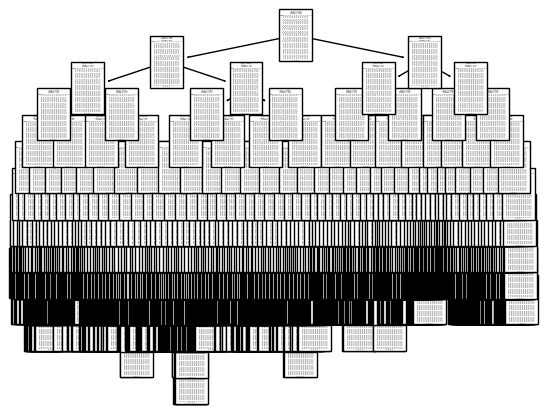

In [9]:
dt = DecisionTreeClassifier(random_state = 5, criterion = "entropy", max_depth = None,)
dt.fit(X_train_normalized, y_train)
tree.plot_tree(dt)
dt_predict = dt.predict(X_test_normalized)
dt_accuracy = accuracy_score(y_test, dt_predict)
print(dt_accuracy)

Repeat Decision Tree, but with cross validation

In [10]:
from sklearn.model_selection import cross_val_score

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

dt_cross = DecisionTreeClassifier(random_state=5)
dt_cross_accuracy = cross_val_score(dt_cross, X, y, cv=10, scoring='accuracy')
print(f"Decision Tree Cross Validation Accuracy: {dt_cross_accuracy}")

c:\Users\karls\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision Tree Cross Validation Accuracy: [0.         0.00684932 0.01369863 0.         0.         0.
 0.         0.02054795 0.00684932 0.        ]


In [11]:
dt_cv = dt_cross_accuracy.mean()
print(f"Decision Tree Cross Validation Accuracy: {dt_cv}")

Decision Tree Cross Validation Accuracy: 0.004794520547945205
